In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    pytz-2021.1                |     pyhd8ed1ab_0         239 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-

In [2]:
df_HYD = pd.read_csv('https://raw.githubusercontent.com/kasgit20/Capstone-Project_Chaat-Restaurent/main/Hyderabad_venues.csv')
df_HYD.head()

#sep='\t', lineterminator='\r')
#df = pd.read_csv(file, header=None, error_bad_lines=False)
#df = pd.read_csv('C:\\myfile.csv',sep='\t', lineterminator='\r')

,id,name,categories,lat,lng,address,tipcount,like_count,rating,ratingSignals
0,4dc4a65e18506de4adc5d5e5,Pragati,South Indian Restaurant,17.388088,78.481134,"Kandaswamy Lane, Sultan Bazaar, Koti Andhra Pr...",15,38.0,8.3,55.0
1,4d3d4eca14aa8cfaa6d6b15e,Santosh Dhaba,Indian Restaurant,17.388485,78.479509,NaN,15,23.0,8.2,40.0
2,4df9c65c62e1e9a24367f9e5,King & Cardinal,Burger Joint,17.400678,78.488575,Himayatnagar,20,35.0,8.4,57.0
3,4cdd08d4fc973704fe47d905,Mayur Pan Shop,Juice Bar,17.388894,78.480578,Hanuman Tekdi Rd.,21,48.0,7.9,71.0
4,4e009da21838cb6a1acb225e,Minerva Coffee Shop,Indian Restaurant,17.401410,78.485672,Himyathnagar,31,74.0,8.3,108.0


In [3]:
df_HYD.shape

(51, 10)

In [4]:
#Data Cleaning: remove the unwanted columns and rows from dataset

df_Res = df_HYD[df_HYD.lng !=0.000000][['name','categories','lat','lng','address','like_count','rating']]
df_Res = df_Res[df_Res['rating'] !=0.0]
df_Res.head()


,name,categories,lat,lng,address,like_count,rating
0,Pragati,South Indian Restaurant,17.388088,78.481134,"Kandaswamy Lane, Sultan Bazaar, Koti Andhra Pr...",38.0,8.3
1,Santosh Dhaba,Indian Restaurant,17.388485,78.479509,NaN,23.0,8.2
2,King & Cardinal,Burger Joint,17.400678,78.488575,Himayatnagar,35.0,8.4
3,Mayur Pan Shop,Juice Bar,17.388894,78.480578,Hanuman Tekdi Rd.,48.0,7.9
4,Minerva Coffee Shop,Indian Restaurant,17.401410,78.485672,Himyathnagar,74.0,8.3


In [5]:
df_Res.shape

(51, 7)

In [6]:
#Now create a map to show the restaurant cluters in Hyderabad city

HYD_Rest = folium.Map(location=[17.3861,78.4639], zoom_start=12)

X = df_Res['lat']
Y = df_Res['lng']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for lat, lng, address, cluster in zip(df_Res['lat'], df_Res['lng'], df_Res['address'], df_Res['Cluster']):
    label = folium.Popup(address, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(HYD_Rest)  

HYD_Rest

In [7]:
df_Res.head()

,name,categories,lat,lng,address,like_count,rating,Cluster
0,Pragati,South Indian Restaurant,17.388088,78.481134,"Kandaswamy Lane, Sultan Bazaar, Koti Andhra Pr...",38.0,8.3,0
1,Santosh Dhaba,Indian Restaurant,17.388485,78.479509,NaN,23.0,8.2,0
2,King & Cardinal,Burger Joint,17.400678,78.488575,Himayatnagar,35.0,8.4,2
3,Mayur Pan Shop,Juice Bar,17.388894,78.480578,Hanuman Tekdi Rd.,48.0,7.9,0
4,Minerva Coffee Shop,Indian Restaurant,17.401410,78.485672,Himyathnagar,74.0,8.3,2


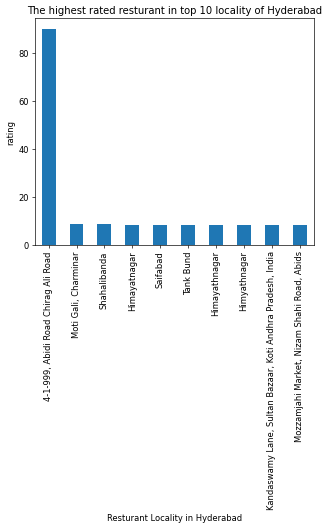

In [41]:
#Let's find out Which areas in Hyderabad have the best restaurants

import matplotlib.pyplot as plt
plt.figure(figsize=(6,5), dpi = 60)
# title
plt.title('The highest rated resturant in top 10 locality of Hyderabad')
#On x-axis

#giving a bar plot
df_Res.groupby('address')['rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Hyderabad')
#On y-axis
plt.ylabel('rating')
#displays the plot
plt.show()



In [ ]:
#The best restaurants are available in Chirag Ali road in hyderabad

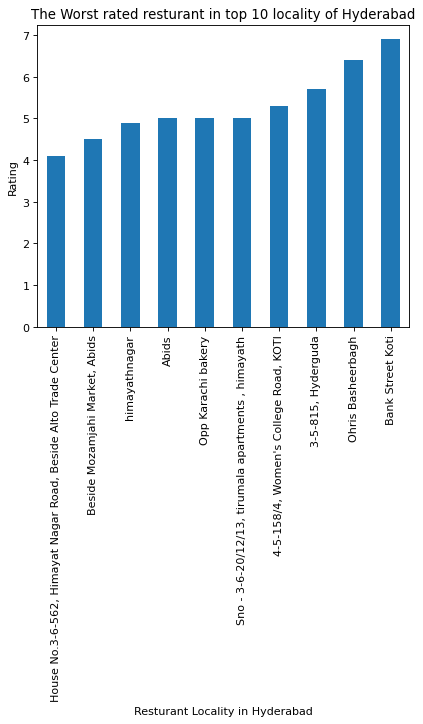

In [40]:
#what places are have worst restaurants in Hyderabad?

import matplotlib.pyplot as plt
plt.figure(figsize=(6,5), dpi = 80)
# title
plt.title('The Worst rated resturant in top 10 locality of Hyderabad')
#On x-axis

#giving a bar plot

df_Res.groupby('address')['rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Hyderabad')
#On y-axis
plt.ylabel('Rating')

#displays the plot
plt.show()



In [ ]:
#The worst restaurants are available in Himayath nagar

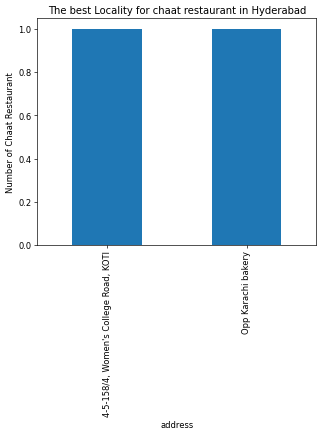

In [39]:
#What are the best places for chaat restaurant in Hyderabad

import matplotlib.pyplot as plt
plt.figure(figsize=(6,5), dpi = 60)

# title
plt.title('The best Locality for chaat restaurant in Hyderabad')
#On x-axis

#giving a bar plot
df_Res[df_Res['categories'].str.startswith('Chat')].groupby('address')['name'].count().nlargest(5).plot(kind='bar')


#On y-axis
plt.ylabel('Number of Chaat Restaurant')

#displays the plot
plt.show()


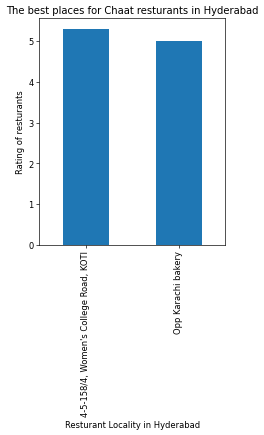

In [38]:
#which places are the best chaat resturants in Hyderabad?

import matplotlib.pyplot as plt
plt.figure(figsize=(4,5), dpi = 60)

# title
plt.title('The best places for Chaat resturants in Hyderabad')
#On x-axis

#giving a bar plot
df_Res[df_Res['categories'].str.startswith('Chat')].groupby('address')['rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Hyderabad')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()


In [28]:
#Based on Locality grouping the data

df_Res_Loc =  df_Res.groupby('address').count()['name'].to_frame()
d_Lat = df_Res.groupby('address').mean()['lat'].to_frame()
d_Lng = df_Res.groupby('address').mean()['lng'].to_frame()
d_Cuisines = df_Res.groupby(['address'])['categories'].agg(', '.join).reset_index()
df_Res_rating= df_Res.groupby('address')['rating'].mean().to_frame()
d_V = df_Res.groupby(['address'])['like_count'].sum().to_frame()

df_final = pd.merge(d_Lat,d_Lng,on='address').merge(df_Res_Loc, on='address').merge(d_Cuisines, on='address').merge(df_Res_rating,on ='address').merge(d_V, on ='address')



In [29]:
df_final = df_final[df_final['rating'] != 0.000000]
df_final.columns =['name','address','lat','lng','categories','rating','like_count']
df_final.head()

,name,address,lat,lng,categories,rating,like_count
0,"(Chaitanya Muppala) Lingapur Building,Himayath...",17.401319,78.485872,1,Dessert Shop,8.0,9.0
1,"3-5-815, Hyderguda",17.399595,78.478566,1,Indian Restaurant,5.7,90.0
2,"4-1-967/7 & 970, Ahuja Estate,",17.391209,78.477575,1,Diner,7.1,12.0
3,"4-1-999, Abidi Road Chirag Ali Road",17.391942,78.476915,1,Hotel,90.0,6357.3
4,"4-5-158/4, Women's College Road, KOTI",17.384716,78.483152,1,Chat Place,5.3,47.0


In [30]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'KEWJAE5Y42XY3S40K4MHMS1GGBSFLUQTAY2ZZVUOJK5BQCJB' # Foursquare ID
CLIENT_SECRET = 'QKIMMZKPJGIE2GQDHCNQZOZC4SYMNDCUEGZXDII1AOBDCKV1' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: KEWJAE5Y42XY3S40K4MHMS1GGBSFLUQTAY2ZZVUOJK5BQCJB
CLIENT_SECRET:QKIMMZKPJGIE2GQDHCNQZOZC4SYMNDCUEGZXDII1AOBDCKV1


In [33]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['address', 
                  'address lat', 
                  'addess lng', 
                  'Venue', 
                  'Venue lat', 
                  'Venue lng', 
                  'Venue categories']
    
    return(nearby_venues)


In [34]:
# find the venues in Hyderabad Locality
HYD_venues = getNearbyVenues(names=df_final['address'],
                                   latitudes=df_final['lat'],
                                   longitudes=df_final['lng']
                            )

17.40131934
17.39959528
17.39120903
17.3919419
17.38471608
17.38776016
17.38796766
17.38432063
17.41211297
17.36413201
17.37177288
17.38889398
17.4042836
17.40067831
17.40140091
17.40140987
17.401162300000003
17.38808781
17.35929974
17.38345374
17.37114674
17.40487191
17.36155458
17.38239773
17.42381663
17.40900704
17.40652963
17.40632866
17.40636912
17.39971498
17.40322092
17.34789913
17.35660939
17.40161691
17.40318457
17.41938355
17.39965236


ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements